In [54]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
import keras

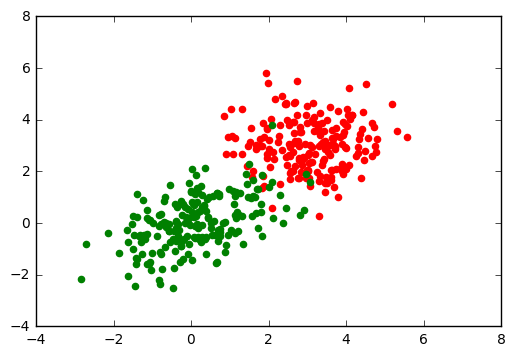

In [56]:
mean_1=[3,3]
cov_1=[[1,0],[0,1]]
dist_1=np.random.multivariate_normal(mean_1,cov_1,200)
mean_2=[0,0]
cov_2=[[1,0.5],[0.5,1]]
dist_2=np.random.multivariate_normal(mean_2,cov_2,200)
plt.scatter(dist_1[:,0],dist_1[:,1],color='red')
plt.scatter(dist_2[:,0],dist_2[:,1],color='green')

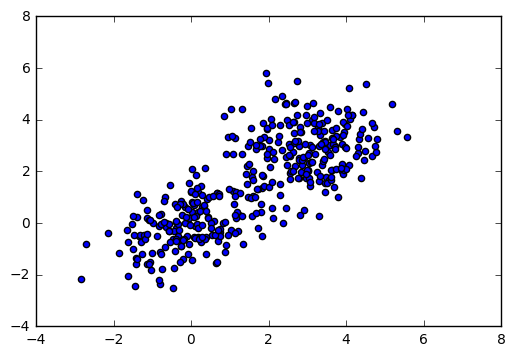

In [57]:
data=np.zeros((dist_1.shape[0]+dist_2.shape[0],dist_1.shape[1]+1))
data[:200,:2]=dist_1
data[200:,:2]=dist_2
plt.scatter(data[:,0],data[:,1])
data[200:,2]=1

In [58]:
print data

[[ 5.58239002  3.3376406   0.        ]
 [ 3.72189957  2.98137251  0.        ]
 [ 3.52534697  2.75890467  0.        ]
 ..., 
 [ 0.26964128 -0.55201871  1.        ]
 [ 0.68776998 -0.27064456  1.        ]
 [ 0.71642608  1.06798749  1.        ]]


In [59]:
import random
random.shuffle(data)

In [60]:
from keras.layers import Input,Dense,Activation
from keras.models import Sequential
from keras.utils import np_utils

In [61]:
split=int(0.8*data.shape[0])
x_train=data[:split,:-1]
y_train=np_utils.to_categorical(data[:split,-1])
x_test=data[split:,:-1]
y_test=np_utils.to_categorical(data[split:,-1])


In [62]:
#-----keras -----
model=Sequential()
fc1=Dense(2,input_shape=(2,))
model.add(fc1)
model.add(Activation('softmax'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 2)             6           dense_input_5[0][0]              
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 2)             0           dense_5[0][0]                    
Total params: 6
____________________________________________________________________________________________________


In [63]:
hist=model.fit(x_train,y_train,nb_epoch=100,shuffle=True,validation_data=(x_test,y_test))


Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 0s - loss: 1.3996 - acc: 0.3062 - val_loss: 0.7414 - val_acc: 0.5875
Epoch 2/100
320/320 [==============================] - 0s - loss: 0.5155 - acc: 0.7250 - val_loss: 0.5296 - val_acc: 0.7000
Epoch 3/100
320/320 [==============================] - 0s - loss: 0.2874 - acc: 0.9062 - val_loss: 0.4722 - val_acc: 0.7375
Epoch 4/100
320/320 [==============================] - 0s - loss: 0.2085 - acc: 0.9313 - val_loss: 0.4507 - val_acc: 0.7750
Epoch 5/100
320/320 [==============================] - 0s - loss: 0.1717 - acc: 0.9406 - val_loss: 0.4410 - val_acc: 0.7500
Epoch 6/100
320/320 [==============================] - 0s - loss: 0.1509 - acc: 0.9594 - val_loss: 0.4362 - val_acc: 0.7625
Epoch 7/100
320/320 [==============================] - 0s - loss: 0.1378 - acc: 0.9594 - val_loss: 0.4337 - val_acc: 0.7750
Epoch 8/100
320/320 [==============================] - 0s - loss: 0.1288 - acc: 0.9594 

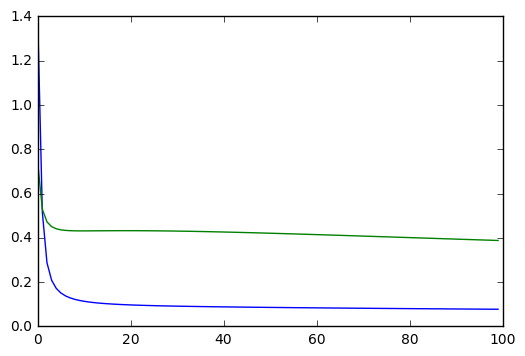

In [65]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])


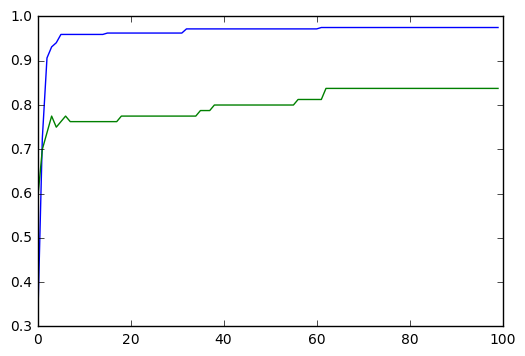

In [66]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],color='green')